# Get data and graphical representation of a given crypto coin

### Credits: Data is obtained from http://coinmarketcap.northpole.ro

In [2]:
URL = ('http://coinmarketcap.northpole.ro')

Load required components

In [22]:
import requests, pandas as pd
import matplotlib.pyplot as plt,matplotlib.dates as mdates
from matplotlib.ticker import FuncFormatter,FormatStrFormatter
import datetime

View valid choices. Print first 10 options.

In [29]:
def get_valid_coins():
    r = requests.get(URL+'/coins.json')
    return tuple(pd.DataFrame(r.json()['coins'])['identifier'])    

In [30]:
get_valid_coins()[:10]

('0chain',
 '0x',
 '0xbtc',
 '0xcert',
 '10mtoken',
 '1337',
 '1337coin',
 '1credit',
 '1world',
 '23-skidoo')

Perform API calls. Will get data for Ethereum YTD.

In [23]:
def get_data(coin, period):
    r = requests.get(URL+f'/history.json?coin={coin}&period={period}')
    df = pd.DataFrame(r.json()['history'])
    df = pd.concat([df,df['marketCap'].apply(pd.Series).add_prefix('marketCap_')],axis=1)
    df = pd.concat([df,df['price'].apply(pd.Series).add_prefix('price_')],axis=1)
    df = pd.concat([df,df['volume24'].apply(pd.Series).add_prefix('volume24_')],axis=1)
    df['date'] = pd.to_datetime(df['date'])
    df = df[df['date']<datetime.datetime.now()]
    return df

In [24]:
df = get_data('ethereum',2018)

View data as a Pandas DataFrame

In [32]:
df.head()

,availableSupply,category,change1h,change24h,change7d,date,identifier,marketCap,name,position,...,volume24_php,volume24_pkr,volume24_pln,volume24_rub,volume24_sek,volume24_sgd,volume24_thb,volume24_try,volume24_twd,volume24_zar
0,96725296,currency,0.49,16.59,15.25,2018-02-01,ethereum,"{'usd': 85960061119.0, 'btc': 6183483.76818, '...",Ethereum,3,...,2.690096e+11,5.957101e+11,1.866503e+10,3.098624e+11,4.395972e+10,7.172926e+09,1.751537e+11,2.033810e+10,1.595677e+11,6.662562e+10
1,96730420,currency,-1.47,13.10,13.51,2018-03-01,ethereum,"{'usd': 84960456256.3, 'btc': 5731790.07654, '...",Ethereum,3,...,2.854357e+11,6.329978e+11,1.976212e+10,3.295849e+11,4.675769e+10,7.603598e+09,1.856426e+11,2.154693e+10,1.692425e+11,7.118186e+10
2,96826696,currency,0.97,9.75,56.12,2018-07-01,ethereum,"{'usd': 110264304728.0, 'btc': 6559514.82932, ...",Ethereum,3,...,2.600221e+11,5.792283e+11,1.802175e+10,2.973003e+11,4.257413e+10,6.924084e+09,1.679674e+11,1.950825e+10,1.539113e+11,6.430989e+10
3,96843149,currency,0.00,9.82,61.33,2018-08-01,ethereum,"{'usd': 118937914019.0, 'btc': 7430087.2723, '...",Ethereum,2,...,3.442019e+11,7.627234e+11,2.377516e+10,3.916057e+11,5.614105e+10,9.152792e+09,2.213931e+11,2.571557e+10,2.028845e+11,8.481772e+10
6,96962219,currency,-1.32,10.32,32.83,2018-01-14,ethereum,"{'usd': 135242903583.0, 'btc': 9404307.47976, ...",Ethereum,2,...,2.894805e+11,6.345967e+11,1.962256e+10,3.251638e+11,4.619712e+10,7.597336e+09,1.823597e+11,2.152003e+10,1.699318e+11,7.095603e+10


Plot data series

In [26]:
def plot(df):
    %matplotlib inline
    plt.style.use('seaborn-white')
    
    x = sorted(df['date'])
    y = df['price_usd']
    z = df['volume24_usd']


    def millions(x, pos):
        'The two args are the value and tick position'
        return '$%1.1fB' % (x*1e-9)

    formatter = FuncFormatter(millions)


    fig = plt.figure()
    fig.set_size_inches(14, 6)
    ax1 = fig.add_subplot(1,1,1)

    plt.xticks(rotation=90)
    ax1.yaxis.set_major_formatter(FormatStrFormatter('$%1.1f'))
    ax1.xaxis.set_major_locator(mdates.DayLocator(interval=28))
    ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))


    ax1.plot(x,y,'r')
    ax1.set_ylabel('Price')
    ax1.tick_params('y')

    ax2 = ax1.twinx()

    ax2.plot(x,z,'b--')
    ax2.set_ylabel('Volume')
    ax2.yaxis.set_major_formatter(formatter)

    lines, labels = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax2.legend(lines + lines2, labels + labels2, loc=2)

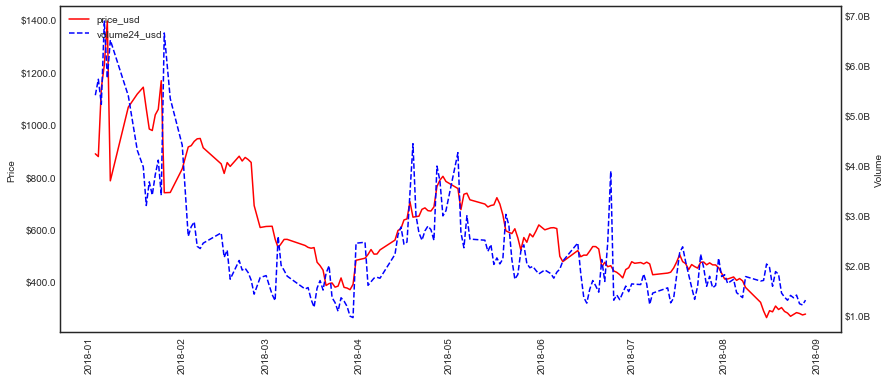

In [27]:
plot(df)